Problem Statement
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

Reference1- https://www.analyticsvidhya.com/blog/2016/02/bigmart-sales-solution-top-20/

Reference2- https://github.com/IamAmar/Big-Mart-Sales-II

In [ ]:

#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
#Reading the Datasets.
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [3]:
train['source']='train'
test['source']='test'

In [4]:
#Merging both the data sets
Data = pd.concat([train,test],ignore_index=True)
Data.head()
Data.apply(lambda x: sum(x.isnull()))


Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [5]:
#Imputing the missing values
Data['Item_Weight'] = Data['Item_Weight'].fillna(Data['Item_Weight'].median())
Data['Outlet_Size'] = Data['Outlet_Size'].fillna(Data['Outlet_Size'].mode()[0])

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  14204 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  14204 non-null object
Outlet_Type                  14204 non-null object
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


In [7]:
Data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


## EDA

In [8]:
#Print frequency of categorical values

for col in ['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Size','Outlet_Type']:
    print ('\nFrequency of Categories for varible %s'%col)
    print (Data[col].value_counts())


Frequency of Categories for varible Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

F

In [9]:
#In Tier 1 Location, There are No High Size Outlets
#In Tier 2 Location, There are only Small Size Outlets
##In Tier 3 Location, There are No Small Size Outlets

Table2 = pd.crosstab(index=Data['Outlet_Size'],columns=Data['Outlet_Location_Type'])
Table2

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,1553
Medium,1550,3091,4030
Small,2430,1550,0


In [10]:
#Grocery Store is always small.
#Supermarket Type 1 can be found in all the different sizes.
#Supermarket Type 2 can be found in only the medium size.
#Supermarket Type 1 can be found in all the different sizes.
Table3 = pd.crosstab(index=Data['Outlet_Size'],columns=Data['Outlet_Type'])
Table3

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,1553,0,0
Medium,925,4641,1546,1559
Small,880,3100,0,0


In [11]:
#Normalise Item_Fat_Content to lowercase and then to dummy variables

Data['Item_Fat_Content'] = Data['Item_Fat_Content'].str.lower()
Data['Item_Fat_Content'] = Data['Item_Fat_Content'].replace(['lf'], 'low fat')
Data['Item_Fat_Content'] = Data['Item_Fat_Content'].replace(['reg'], 'regular')

In [12]:
#Get the first two characters of ID:
Data['Item_Type_Combined'] = Data['Item_Identifier'].apply(lambda x: x[0:2])

#Rename them to more intuitive categories:
Data['Item_Type_Combined'] = Data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
Data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [13]:
#New column to calculate the age of a outlet
Data['Outlet_Age']= 2013 - Data['Outlet_Establishment_Year']

#Function for visibility
def gen_type(x):
    if x >= 0.0 and x < 0.04:
        return 'Low'
    elif x >= 0.04 and x < 0.07 :
        return 'Medium'
    else:
        return 'High'

#Apply the function to create the Gen_Item_type based on Item_Identifier field.
Data['Visibilty_Score'] = Data['Item_Visibility'].apply(gen_type)

In [14]:
Data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Item_Type_Combined,Outlet_Age
0,low fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,14
1,regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,Drinks,4
2,low fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,Food,14
3,regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,train,Food,15
4,low fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,Non-Consumable,26


In [15]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 15 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  14204 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  14204 non-null object
Outlet_Type                  14204 non-null object
source                       14204 non-null object
Item_Type_Combined           14204 non-null object
Outlet_Age                   14204 non-null int64
dtypes: float64(4), int64(2), object(9)
memory usage: 1.6+ MB


Listing some of the Hypothesis which are to be tested

1.Outlet_location_type vs sales (Usually Tier 1 locations tend to have Higer volume of sales)
2.Outlet_size vs sales (Big Size outlets should have higher sales)
3.Age of the outlet vs sales (Usually old outlets have higher sales)
4.Item_type vs sales (which item has more sales)
5.Outlet_type vs sales




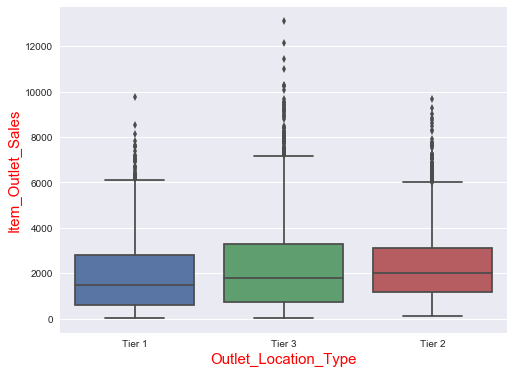

In [16]:
#Outlet_Location_Type vs Item_Outlet_Sales
#Tier3 cities have more sales, Compared to the others. Is the Data Skewed towards Tier3 cities ? or the tier 1 city outlets has no proper 
#advertisments, marketing compared to their competitors.


plt.figure(figsize=(8,6))
b = sns.boxplot(train['Outlet_Location_Type'],train['Item_Outlet_Sales'])
b.set_xlabel(b.get_xlabel(),color='red',fontsize=15)
b.set_ylabel(b.get_ylabel(),color='red',fontsize=15)

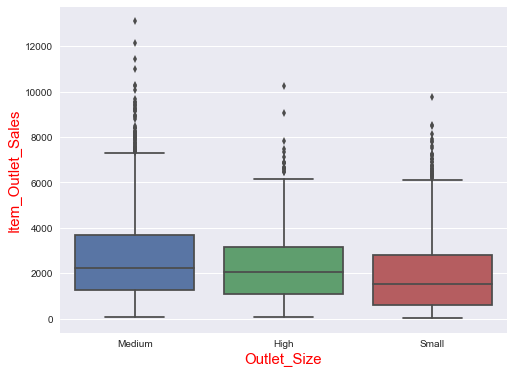

In [17]:
#Outlet_size vs sales, Medium sized outlets has the highest volumes of sales among the three.

plt.figure(figsize=(8,6))
b = sns.boxplot(train['Outlet_Size'],train['Item_Outlet_Sales'])
b.set_xlabel(b.get_xlabel(),color='red',fontsize=15)
b.set_ylabel(b.get_ylabel(),color='red',fontsize=15)

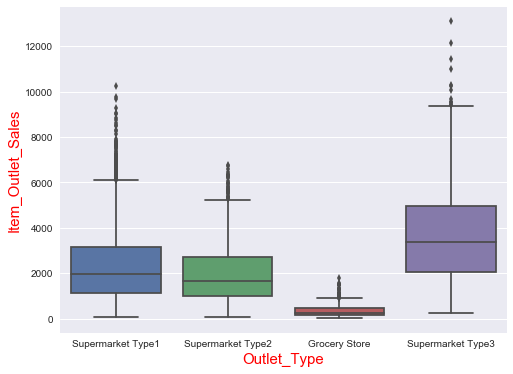

In [18]:
#Outlet type vs Sales -Supermarket3 has higher sales.
#Grocery stores are not doing well.
#If you are opening up a new Big mart in the near future Combination of the Medium Sized outlets and Supermarket Type 3, 
#Will be the most profitable store.
plt.figure(figsize=(8,6))
b = sns.boxplot(train['Outlet_Type'],train['Item_Outlet_Sales'])
b.set_xlabel(b.get_xlabel(),color='red',fontsize=15)
b.set_ylabel(b.get_ylabel(),color='red',fontsize=15)


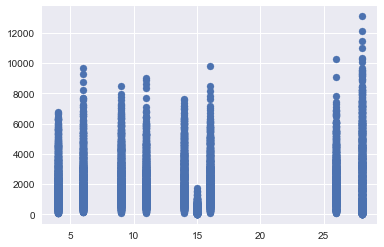

In [19]:
#There is no interesting pattern, which can be told using "AGE".
plt.scatter(x='Outlet_Age',y='Item_Outlet_Sales',data=Data)


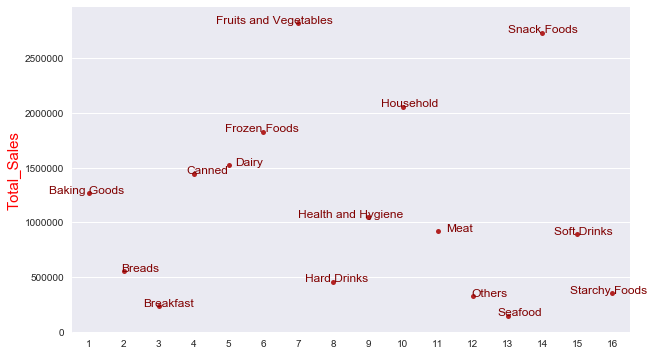

In [20]:
#Snack foods, Fruits and the Vegetables have the highest amount in sales. Seafood and Breakfast are the one's with the least sales.

temp1 = Data.groupby(by='Item_Type').sum()['Item_Outlet_Sales']
plt.figure(figsize=(10,6))
sns.stripplot(np.arange(1,len(temp1.index.values)+1),temp1.values,color='firebrick')
for x,y in zip(np.arange(1,len(temp1.index.values)+1),temp1.values):
    plt.text(x,y,str(temp1.index.values[x-1]),fontsize=12,horizontalalignment='right',color='maroon')
plt.ylabel('Total_Sales',fontsize=15,color='red')

In [21]:
#Following the above analysis and intitution, we decided to drop these columns

Data = Data.drop(["Item_Identifier","Item_Fat_Content","Item_Type","Outlet_Establishment_Year"],axis=1)

## Data pre-processing for Model Building

In [22]:
train = Data[Data['source']=='train']
test = Data[Data['source']=='test']
X_train = train.drop(["source", "Item_Outlet_Sales"], axis = 1)
y_train = train["Item_Outlet_Sales"].copy()
X_test = test.drop(["source","Item_Outlet_Sales"],axis =1)
y_test = train["Item_Outlet_Sales"].copy()

In [23]:
X_train.head()

,Item_MRP,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Type_Combined,Outlet_Age
0,249.8092,0.016047,9.30,OUT049,Tier 1,Medium,Supermarket Type1,Food,14
1,48.2692,0.019278,5.92,OUT018,Tier 3,Medium,Supermarket Type2,Drinks,4
2,141.6180,0.016760,17.50,OUT049,Tier 1,Medium,Supermarket Type1,Food,14
3,182.0950,0.000000,19.20,OUT010,Tier 3,Medium,Grocery Store,Food,15
4,53.8614,0.000000,8.93,OUT013,Tier 3,High,Supermarket Type1,Non-Consumable,26


In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 9 columns):
Item_MRP                8523 non-null float64
Item_Visibility         8523 non-null float64
Item_Weight             8523 non-null float64
Outlet_Identifier       8523 non-null object
Outlet_Location_Type    8523 non-null object
Outlet_Size             8523 non-null object
Outlet_Type             8523 non-null object
Item_Type_Combined      8523 non-null object
Outlet_Age              8523 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 665.9+ KB


In [25]:
y_train.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

## Transformation Pipelines

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [27]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, do not try to understand it (yet).

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [28]:
num_attribs = ["Item_MRP", "Item_Weight", "Outlet_Age", "Item_Visibility"]
cat_attribs = ["Outlet_Identifier","Outlet_Location_Type","Outlet_Size",
               "Outlet_Type","Item_Type_Combined"]

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
#         ('imputer', Imputer(strategy="median")),
#         ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ])


In [29]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [30]:
X_train_prepared = full_pipeline.fit_transform(X_train)

In [31]:
X_train_prepared

array([[ 1.74745381, -0.83118663, -0.13954076, ...,  0.        ,
         1.        ,  0.        ],
       [-1.48902325, -1.63080955, -1.33410274, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.01004021,  1.10872696, -0.13954076, ...,  0.        ,
         1.        ,  0.        ],
       ..., 
       [-0.89720755, -0.52363935, -0.73682175, ...,  0.        ,
         0.        ,  1.        ],
       [-0.60797692, -1.32562802, -1.33410274, ...,  0.        ,
         1.        ,  0.        ],
       [-1.05226104,  0.46997492,  0.09937163, ...,  1.        ,
         0.        ,  0.        ]])

In [32]:
X_train_prepared.shape

(8523, 27)

In [33]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
# let's try the full pipeline on a few training instances
some_data = X_train.iloc[:5]
some_labels = y_train.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 4079.42902489   537.91429318  2390.87551881  1021.3218513    921.52305137]


In [35]:
print("Labels:", list(some_labels))

Labels: [3735.1379999999999, 443.4228, 2097.27, 732.38, 994.70519999999999]


In [36]:
from sklearn.metrics import mean_squared_error

Sales_predictions = lin_reg.predict(X_train_prepared)
lin_mse = mean_squared_error(y_train, Sales_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1127.5075917599136

In [37]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_train, Sales_predictions)
lin_mae

836.07056879961601

In [38]:
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_reg, X_train_prepared, y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [39]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [ 1163.75260996  1140.00885257  1122.74056134  1110.28931251  1119.07795133
  1108.47749479  1115.00065326  1134.68693265  1138.61322861  1143.3331342 ]
Mean: 1129.59807312
Standard deviation: 16.6145367083


In [40]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_prepared, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [41]:
Sales_predictions = tree_reg.predict(X_train_prepared)
tree_mse = mean_squared_error(y_train, Sales_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

4.2658400297771948e-15

In [42]:
from sklearn.metrics import mean_absolute_error

tree_mae = mean_absolute_error(y_train, Sales_predictions)
tree_mae

8.0032972700891255e-17

Cross Validation on the training dataset  -- Descision Tree Regressor

In [43]:
scores = cross_val_score(tree_reg, X_train_prepared, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [44]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [ 1637.39773738  1530.87585308  1527.16942956  1482.09200411  1622.98560888
  1458.63955935  1649.45981781  1552.57186046  1511.79582696  1582.52234572]
Mean: 1555.55100433
Standard deviation: 62.3846557321


In [66]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(max_depth=5,min_samples_leaf=50,n_estimators=500)
RF.fit(X_train_prepared,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=50, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [67]:
Sales_predictions = RF.predict(X_train_prepared)
RF_mse = mean_squared_error(y_train, Sales_predictions)
RF_rmse = np.sqrt(RF_mse)
RF_rmse

1068.7220968706331

In [68]:
RF_mae = mean_absolute_error(y_train, Sales_predictions)
RF_mae

749.49971212093317

In [225]:
scores = cross_val_score(RF, X_train_prepared, y_train,
                         scoring="neg_mean_squared_error", cv=10)
RF_rmse_scores = np.sqrt(-scores)

In [226]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(RF_rmse_scores)

Scores: [ 1107.5190078   1090.80345166  1092.13456651  1059.96176225  1087.5699599
  1068.13999455  1051.5988814   1084.60252549  1062.98702759  1110.21108977]
Mean: 1081.55282669
Standard deviation: 19.0436296521


## Fitting the model on Test set for Contest Evaluation.

In [75]:
# Transforming test set using the pipeline 
X_test_prepared = full_pipeline.transform(X_test)

In [76]:
linear_test_predictions = lin_reg.predict(X_test_prepared)

In [78]:
test['Item_Outlet_Sales']= linear_test_predictions[:]

In [79]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1866.392639
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1552.222052
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,1874.384192
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,2613.047039
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,5156.902178


In [81]:
submission_linear = test[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']].copy()

In [82]:
submission_linear.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1866.392639
1,FDW14,OUT017,1552.222052
2,NCN55,OUT010,1874.384192
3,FDQ58,OUT017,2613.047039
4,FDY38,OUT027,5156.902178


In [83]:
submission.to_csv('submission_linear.csv')

### Using linear regression model prediction on test set our submission had a RMSE of 1202.15 with a leader board rank of 985.

In [69]:
RF_test_predictions = RF.predict(X_test_prepared)

In [70]:
test['Item_Outlet_Sales']= RF_test_predictions[:]

In [71]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1574.274529
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,1443.945131
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,597.892604
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,2492.176395
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,6229.004975


In [72]:
submission_RF = test[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']].copy()

In [73]:
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1574.274529
1,FDW14,OUT017,1443.945131
2,NCN55,OUT010,597.892604
3,FDQ58,OUT017,2492.176395
4,FDY38,OUT027,6229.004975


In [74]:
submission.to_csv('submission_RF.csv')

### Using Random forest regressor prediction on test set our submission had a RMSE of 1156.44 and our leader board rank improved to 549.